In [73]:
import numpy as np # 행렬 연산 패키지
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

font_path ='/usr/share/fonts/opentype/noto/NotoSerifCJK-ExtraLight.ttc'
font_name = matplotlib.font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc("font", family = font_name)
from sklearn.tree import export_graphviz
import graphviz
import seaborn as sns #데이터 시각화(추세 등) 패키지
from sklearn.preprocessing import scale, minmax_scale, robust_scale #Scaling클래스
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

In [74]:

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [75]:
df_raw = pd.read_csv("/home/piai/Desktop/POSCO_Ai-BigData_academy/Week2_BigData/실습파일/체질검사.csv", engine = 'python', encoding = 'EUC-KR')
df_raw.head() #데이터 불러오기

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [76]:
df_raw_y=df_raw["FAT"]
df_raw_x=df_raw.drop("FAT", axis=1, inplace=False)#목표변수, 설명변수 지정

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state =1234)
print("train data x size: {}".format(df_train_x.shape))
print("train data y size: {}".format(df_train_y.shape))
print("test data x size: {}".format(df_test_x.shape))
print("test data y size: {}".format(df_test_y.shape))

train data x size: (176, 13)
train data y size: (176,)
test data x size: (76, 13)
test data y size: (76,)


In [77]:
lr_model=smf.ols(formula = "FAT ~ NECK + ABDOMEN + HIP + FOREARM + WRIST", data = df_raw)
lr_result = lr_model.fit()
print(lr_result.summary())
#의사결정트리 생성
dt_model = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 8, min_samples_split = 20, max_depth = 4)
dt_model.fit(df_train_x, df_train_y)
#랜덤포레스트 생성
rf_model = RandomForestRegressor(random_state=1234, n_estimators = 100, min_samples_leaf = 6, min_samples_split = 14, max_depth = 4)
rf_model.fit(df_train_x, df_train_y)
#그래디언트 부스팅 생성
gb_model = GradientBoostingRegressor(random_state=1234, n_estimators = 30, min_samples_leaf = 11, min_samples_split = 22, max_depth = 4, learning_rate = 0.1)
gb_model.fit(df_train_x, df_train_y)

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           4.38e-68
Time:                        15:40:51   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7037      6.231      0.434      0.6

GradientBoostingRegressor(max_depth=4, min_samples_leaf=11,
                          min_samples_split=22, n_estimators=30,
                          random_state=1234)

In [78]:
print(gb_model.score(df_test_x,df_test_y))
print(gb_model.score(df_train_x,df_train_y))

0.6288342830057723
0.8996509846110845


In [79]:

models = ["회귀분석", "의사결정나무", "랜덤 포레스트", "그래디언트 부스팅"] #모델 리스트, 그래프를 그리기 생성 목적
mse, rmse, mae, mape = [],[],[],[] #평가 리스트 초기화

In [80]:

#회귀분석
lr_y_pred = lr_result.predict(df_test_x) #예측
#평가
mse.append(mean_squared_error(df_test_y, lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y, lr_y_pred))
mae.append(mean_absolute_error(df_test_y, lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, lr_y_pred))

In [81]:
#의사결정나무
dt_y_pred = dt_model.predict(df_test_x) #예측
#평가
mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y, dt_y_pred))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))

In [82]:
#회귀분석
rf_y_pred = rf_model.predict(df_test_x) #예측
#평가
mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

In [83]:
#그래디언트 부스팅
gb_y_pred = gb_model.predict(df_test_x) #예측
#평가
mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y, gb_y_pred))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

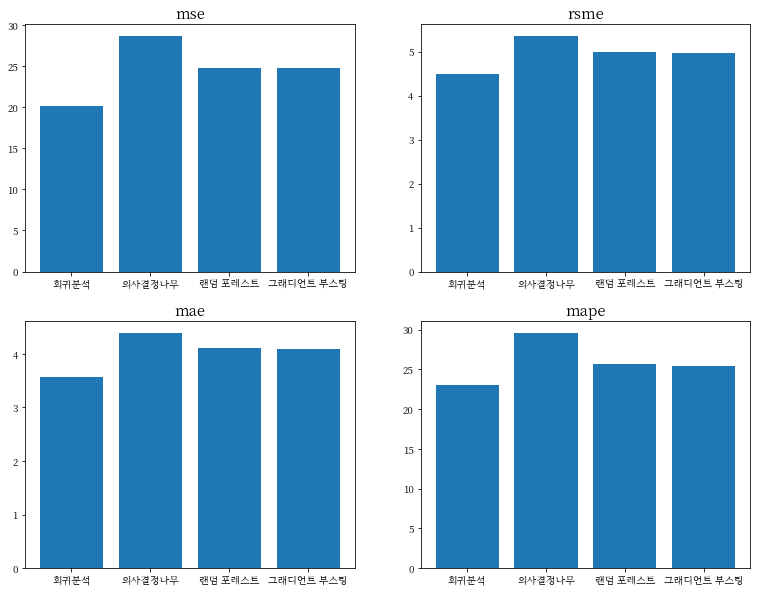

In [84]:
fig, ax = plt.subplots(2,2, figsize = (13, 10))
ax[0,0].bar(models, mse)
ax[0,0].set_title("mse").set_fontsize(15)

ax[0,1].bar(models, rmse)
ax[0,1].set_title("rsme").set_fontsize(15)

ax[1,0].bar(models, mae)
ax[1,0].set_title("mae").set_fontsize(15)

ax[1,1].bar(models, mape)
ax[1,1].set_title("mape").set_fontsize(15)

# 주성분 분석(PCA) 연습


In [85]:
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib

for f in fm.fontManager.ttflist:
    if 'NanumBarunGothic' in f.fname:
        plt.rcParams['font.family'] = 'NanumBarunGothic' # 폰트를 나눔고딕으로
print(plt.rcParams['font.family'])
matplotlib.rcParams['axes.unicode_minus'] = False #'-'기호 제대로 나오게함

['NanumBarunGothic']


In [86]:
df_raw = pd.read_csv("/home/piai/Desktop/POSCO_Ai-BigData_academy/Week2_BigData/실습파일/직무능력평가.csv",encoding = 'euc-kr')
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [87]:
df_raw_x = df_raw.drop("EVAL",axis =1)
df_raw_y = df_raw["EVAL"]
df_raw_x.head()

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,51,30,39,61,92,45
1,64,51,54,63,73,47
2,70,68,69,76,86,48
3,63,45,47,54,84,35
4,78,56,66,71,83,47


In [88]:
#변수강 상관관계분석
df_raw_x.corr().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
DISSATIS,1.000,0.558,0.597,0.669,0.188,0.225
PRIVILEGE,0.558,1.000,0.493,0.445,0.147,0.343
CHANCE,0.597,0.493,1.000,0.640,0.116,0.532
ADVANCE,0.669,0.445,0.640,1.000,0.377,0.574
CRITISM,0.188,0.147,0.116,0.377,1.000,0.283
PROMOTION,0.225,0.343,0.532,0.574,0.283,1.000


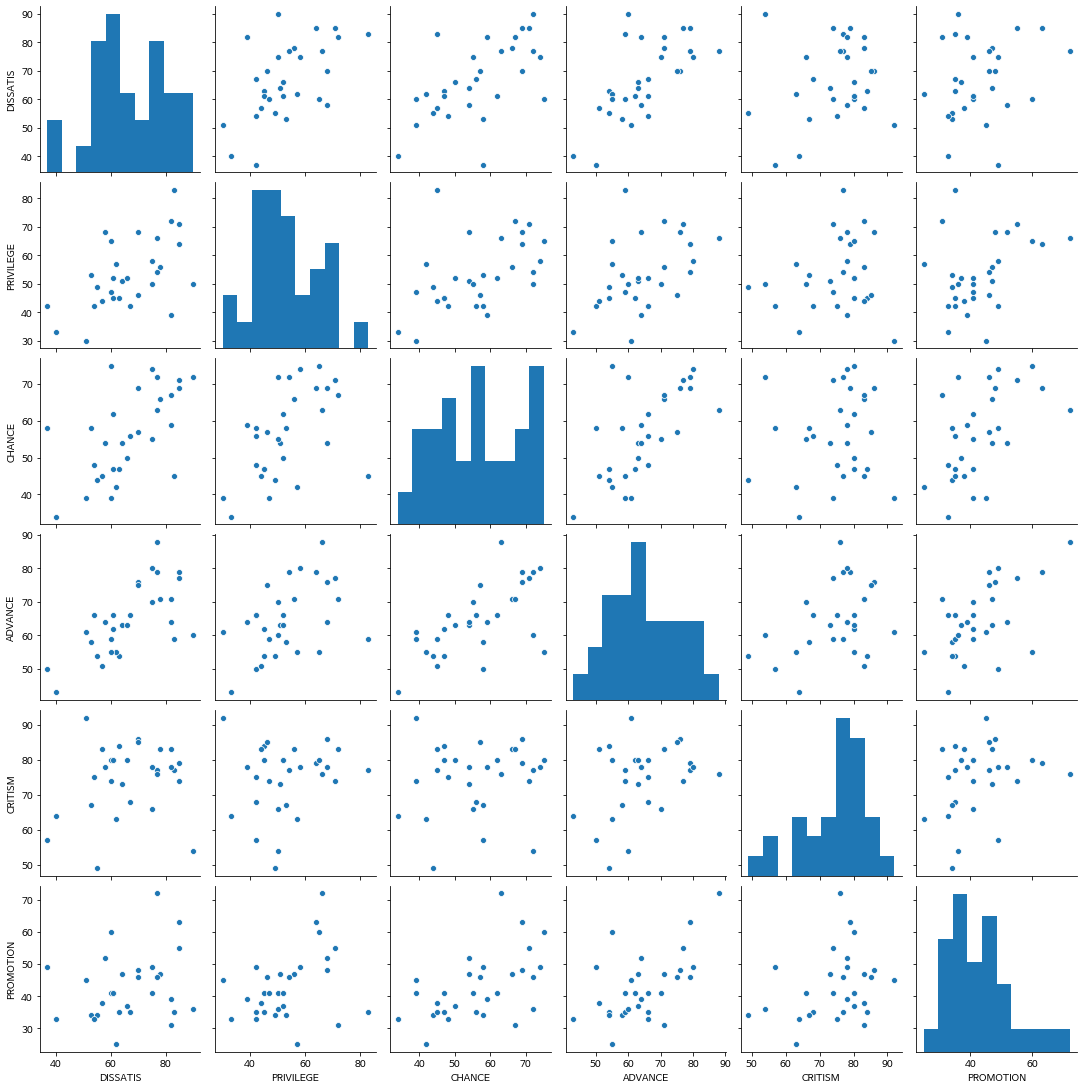

In [89]:
#산점도 행렬
sns.pairplot(df_raw_x)

In [90]:
#데이터 표준화
x_cols =df_raw_x.columns 
scaler = StandardScaler()
#데이터표준화변환
nd_scaled = scaler.fit_transform(df_raw_x)
#표준화된 데이터 확인
print("Scaled Data :\n{}".format(nd_scaled[:5].round(3)))
print("Shape :\n{}".format(nd_scaled.shape))


Scaled Data :
[[-1.192 -1.923 -1.505 -0.355  1.771  0.204]
 [-0.199 -0.177 -0.205 -0.16  -0.182  0.402]
 [ 0.26   1.236  1.095  1.112  1.155  0.501]
 [-0.275 -0.676 -0.812 -1.04   0.949 -0.784]
 [ 0.871  0.238  0.835  0.623  0.846  0.402]]
Shape :
(30, 6)


In [91]:
df_scaled= pd.DataFrame(nd_scaled,columns=x_cols)
df_scaled.head().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,-1.192,-1.923,-1.505,-0.355,1.771,0.204
1,-0.199,-0.177,-0.205,-0.160,-0.182,0.402
2,0.260,1.236,1.095,1.112,1.155,0.501
3,-0.275,-0.676,-0.812,-1.040,0.949,-0.784
4,0.871,0.238,0.835,0.623,0.846,0.402


In [92]:
df_scaled.describe().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
count,30.000,30.000,30.000,30.000,30.000,30.000
mean,0.000,-0.000,-0.000,-0.000,0.000,0.000
std,1.017,1.017,1.017,1.017,1.017,1.017
min,-2.261,-1.923,-1.938,-2.116,-2.649,-1.773
25%,-0.619,-0.676,-0.812,-0.624,-0.567,-0.784
50%,-0.122,-0.136,0.012,-0.111,0.281,-0.191
75%,0.794,0.779,0.900,0.623,0.538,0.476
max,1.787,2.483,1.615,2.286,1.771,2.873


In [93]:

# 주성분 분석모델 생성 Prin1 ~ 6 까지
pca = PCA(n_components=6)
nd_pca = pca.fit_transform(nd_scaled)
#계산된 Prin1~6까지의 Row개수, column개수 화인
print("PCA DATA : \n{}".format(x_pca[:5]))
#shape : Prin 1~6까지 Row개수, column개수 확인
print("Shape: \n{}".format(nd_pca.shape))
#주성분 점수 저장
df_pca = pd.DataFrame(nd_pca,columns = ["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6"])

PCA DATA : 
[[ 1.67606983 -2.73856419 -0.12843595 -0.50321261  0.24330658  0.22576117]
 [ 0.21834397 -0.12615302  0.43115839  0.08726221  0.19566103  0.1941439 ]
 [-2.10515127 -0.51500683 -0.27683087  0.49131136 -0.44691698 -0.63174369]
 [ 1.35994032 -0.86064574 -0.91799066  0.03173793 -0.40137177  0.44095403]
 [-1.5120347  -0.35277019 -0.32684445 -0.32877858 -0.32709718  0.21246099]]
Shape: 
(30, 6)


In [94]:
df_scaled_pca =df_scaled.join(df_pca)
df_scaled_pca.head()

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,-1.191662,-1.923006,-1.504945,-0.355426,1.771410,0.204301,1.676070,-2.738564,-0.128436,-0.503213,0.243307,0.225761
1,-0.198610,-0.177338,-0.205088,-0.159779,-0.181595,0.402012,0.218344,-0.126153,0.431158,0.087262,0.195661,0.194144
2,0.259721,1.235822,1.094768,1.111930,1.154672,0.500868,-2.105151,-0.515007,-0.276831,0.491311,-0.446917,-0.631744
3,-0.274999,-0.676100,-0.811688,-1.040192,0.949092,-0.784254,1.359940,-0.860646,-0.917991,0.031738,-0.401372,0.440954
4,0.870830,0.238298,0.834797,0.622811,0.846302,0.402012,-1.512035,-0.352770,-0.326844,-0.328779,-0.327097,0.212461


In [95]:
# 고유값 확인
#주성분 통계량 입력용 새로운 데이터 프레임 생성
df_pca_stat = pd.DataFrame()
#주성분 분석 모델의 주성분 번호, Elgenvalue, Eigenvalue Ratio 등을 데이터 프레임의 형태로 저장
df_pca_stat["PrinNO"] = [i for i in range(1,7)]
df_pca_stat["EigenValues"] = pca.explained_variance_##Eigen values
df_pca_stat["EigenValueRatio"] = pca.explained_variance_ratio_## Eigenvalue Ratio
df_pca_stat["CumsumEigenValueRatio"] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNO,EigenValues,EigenValueRatio,CumsumEigenValueRatio
0,1,3.279,0.528,0.528
1,2,1.041,0.168,0.696
2,3,0.789,0.127,0.823
3,4,0.572,0.092,0.915
4,5,0.328,0.053,0.968
5,6,0.198,0.032,1.000


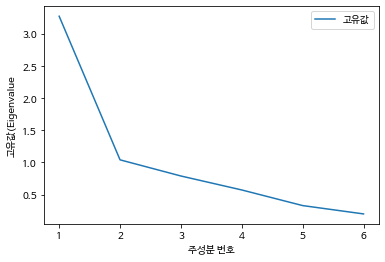

In [96]:
plt.plot(df_pca_stat["PrinNO"],df_pca_stat["EigenValues"],label='고유값')
plt.ylabel("고유값(Eigenvalue")
plt.xlabel("주성분 번호")
plt.legend(loc='best')

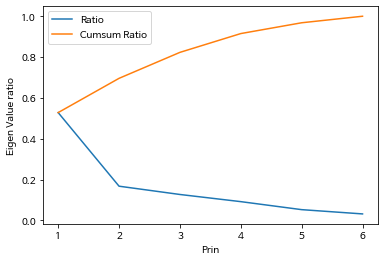

In [102]:
# 고유값 비율 그래프 생성
plt.plot(df_pca_stat["PrinNO"],df_pca_stat["EigenValueRatio"],label ="Ratio")
# 누적된 고유값 비율 그래프 생성
plt.plot(df_pca_stat["PrinNO"],df_pca_stat["CumsumEigenValueRatio"],label = "Cumsum Ratio")
# 그래프 label, lengend 설정
plt.ylabel("Eigen Value ratio")
plt.xlabel("Prin")
plt.legend(loc = "best")


In [105]:
x_cols = pd.DataFrame({"Feature":df_raw_x.columns})

In [107]:
df_eigenvector= pd.concat([x_cols,pd.DataFrame(pca.components_.T * -1, columns = ["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6"])],axis=1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,DISSATIS,0.439,-0.313,0.445,0.316,-0.192,-0.612
1,PRIVILEGE,0.395,-0.309,0.217,-0.815,-0.038,0.190
2,CHANCE,0.461,-0.217,-0.272,0.225,0.776,0.118
3,ADVANCE,0.493,0.116,0.006,0.365,-0.460,0.631
4,CRITISM,0.225,0.802,0.457,-0.100,0.289,-0.058
5,PROMOTION,0.381,0.321,-0.687,-0.206,-0.255,-0.416


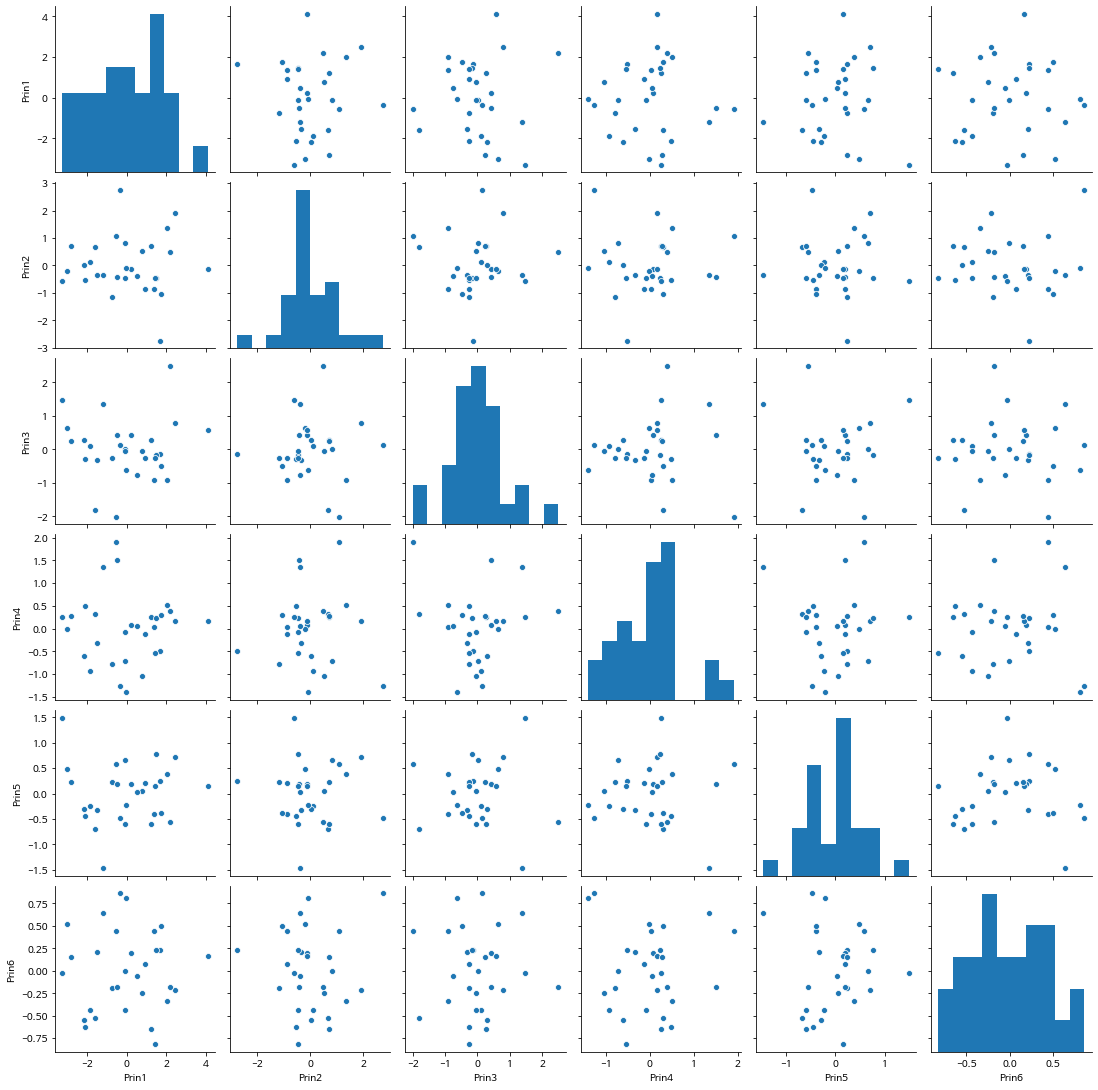

In [108]:
#산점도 행렬
sns.pairplot(df_x_pca)

In [109]:

#상관계수
df_x_pca.corr().round(3)
# 주성분은 서로 독립적, 상관계수 =0

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
Prin1,1.0,0.0,-0.0,-0.0,-0.0,0.0
Prin2,0.0,1.0,0.0,-0.0,-0.0,0.0
Prin3,-0.0,0.0,1.0,0.0,0.0,-0.0
Prin4,-0.0,-0.0,0.0,1.0,-0.0,-0.0
Prin5,-0.0,-0.0,0.0,-0.0,1.0,-0.0
Prin6,0.0,0.0,-0.0,-0.0,-0.0,1.0


In [112]:
df_raw_x_const = sm.add_constant(df_raw_x)
reg_model= sm.OLS(df_raw_y,df_raw_x_const)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           1.24e-05
Time:                        15:47:57   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7871     11.589      0.931      0.3

In [113]:
df_scaled_const = sm.add_constant(df_scaled)
reg_model = sm.OLS(df_raw_y, df_scaled_const)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           1.24e-05
Time:                        15:50:42   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.6333      1.290     50.087      0.0

In [114]:
x_var = ["Prin1","Prin2","Prin3"]
df_pca_const = sm.add_constant(df_pca[x_var])
reg_model = sm.OLS(df_raw_y, df_pca_const)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     14.36
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           1.02e-05
Time:                        15:52:06   Log-Likelihood:                -102.38
No. Observations:                  30   AIC:                             212.8
Df Residuals:                      26   BIC:                             218.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.6333      1.440     44.890      0.0

In [170]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [171]:
df_currency = pd.read_csv("/home/piai/Desktop/POSCO_Ai-BigData_academy/Week2_BigData/실습파일/환율.csv",parse_dates=["APPL_DATE"],encoding = 'euc-kr')
df_currency.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


In [172]:
df_currency.isnull().sum()

CURRENCY         0
APPL_DATE        0
STD_RATE         0
USD_CONV_DATE    0
dtype: int64

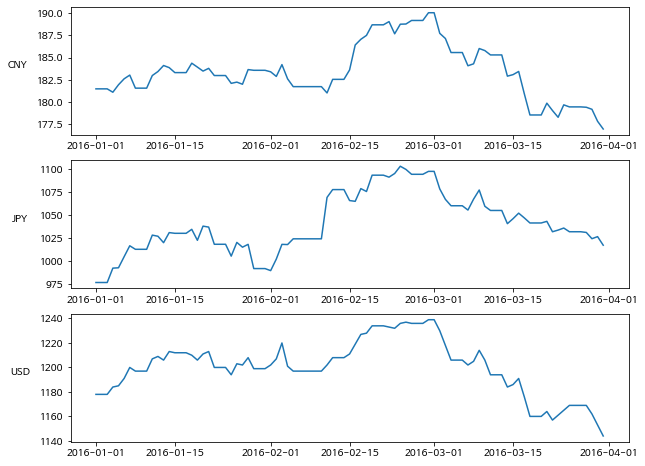

In [173]:
#STEP2. 변동추세확인- 시간에 따른 환율 추세 그래프생성
# 중국 위엔화, 엔화, 달러의 크기가 다르기 때문에 각각 그래프를 생성 / 3행1열, 크기:10,8
fig,(ax1,ax2,ax3)= plt.subplots(nrows= 3,ncols= 1, figsize = (10,8))
#zip 함수를 사용하면 zip함수 안의 리스트들을 하나씩 배출
# 1번loop :ax1, 311, "CNY"
# 2번loop :ax2, 312, "JPY"
# 3번loop :ax3, 313, "USD"
for(ax,idx,currency) in zip([ax1,ax2,ax3],[311,312,313],["CNY","JPY","USD"]):
    #plot 추가, 311 -> 3행 1열의 1번 그래프
    ax.plot("APPL_DATE","STD_RATE",data = df_currency[df_currency["CURRENCY"]==currency])
    ax.set_ylabel(currency,rotation = 0, labelpad = 20)


In [174]:
#CNY 데이터 추출 후 APPL_DATE를 INDEX로 설정
df_currency_cny= df_currency[df_currency["CURRENCY"]=="CNY"].set_index("APPL_DATE")
#drop method를 이용하여 통화(currency)와 미달러 환산율(USD_CONV_DATE)변수제외
df_currency_cny.drop(["CURRENCY","USD_CONV_DATE"],axis=1,inplace = True)
#JPY데이터 생성
df_currency_jpy = df_currency[df_currency["CURRENCY"] == "JPY"].set_index("APPL_DATE")
df_currency_jpy.drop(["CURRENCY","USD_CONV_DATE"],axis=1,inplace = True)
#USD데이터 생성
df_currency_usd = df_currency[df_currency["CURRENCY"] == "USD"].set_index("APPL_DATE")
df_currency_usd.drop(["CURRENCY","USD_CONV_DATE"],axis=1,inplace = True)
df_currency_cny.head()
# 중국위엔화환율데이터

,STD_RATE
APPL_DATE,
2016-01-01,181.48
2016-01-02,181.48
2016-01-03,181.48
2016-01-04,181.10
2016-01-05,181.94


In [175]:
train_size= 0.9
len_idx= len(df_currency_cny.index)
mask=(np.arange(len_idx)/len_idx)<train_size


df_cny_train= df_currency_cny[mask]
df_cny_test= df_currency_cny[~mask]
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False])

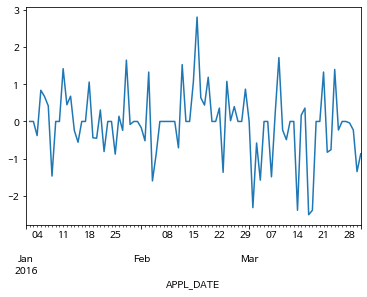

In [176]:
#STEP3.시계열 분석: 데이터 분할 - 차분을 통하여 정상성 데이터로 변화
# 1번차분:z(t)- z(t-1)
# shift(n): 앞의 n번 째 행의 데이터를 가져옴
df_cny_diff1 = df_currency_cny["STD_RATE"] - df_currency_cny["STD_RATE"].shift(1)
df_cny_diff1.plot()


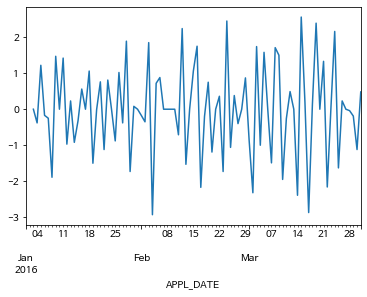

In [177]:
#2번차분 (z(t)-z(t-1))-(z(t-1)-z(t-2)) = z(t)-2*z(t-1) +z(t-2)
df_cny_diff2 = df_currency_cny["STD_RATE"]-2*(df_currency_cny["STD_RATE"].shift(1))+\
    (df_currency_cny["STD_RATE"].shift(2))

df_cny_diff2.plot()


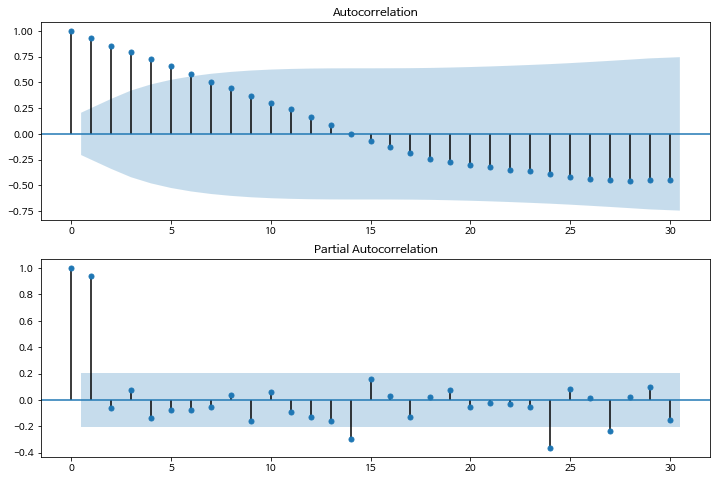

In [178]:
#STEP 3. 시계열분석 - 자기상관 함수 및 부분 자기상관함수
# LAG를 30까지 하여 ACF,PACF산출
lag_size = 30
fig = plt.figure(figsize = (12,8))
# acf 그래프를 그릴 공간 생성
ax1= fig.add_subplot(211)
# 자기상관 함수 그래프 plot_acf함수 사용 -> 위에 생성한 공간에 그래프 넣기
fig = plot_acf(df_currency_cny["STD_RATE"],lags = lag_size, ax = ax1)
#pacf 그래프를 그릴 공간 생성
ax2 = fig.add_subplot(212)
# 부분 자기상관 함수 그래프 plot_pacf 함수사용 -> 위에 생성한 공간에 그래프넣기
fig = plot_pacf(df_currency_cny["STD_RATE"],lags = lag_size, ax = ax2)



In [179]:
#AR(1),l(2, 차분),MA(0)인 ARIMA모델
#MA(0)인 이유: 평균을 낼 구간이 현재시점에서 과거 한시점밖에 없으므로 MA가 필요없다
ts_model_cny = ARIMA(df_currency_cny,order = (1,2,0))
#데이터 적합
# trend:상수포함 여부 "nc"이면 상수 미포함, full_output:모든 출력 결과 표시, disp : 수렴정보 출력
ts_result_cny = ts_model_cny.fit(trend= "c",full_output=True,disp = 1)
print(ts_result_cny.summary())
# 절편은 유의하지 않더라도 모델에 포함


                             ARIMA Model Results                              
Dep. Variable:            D2.STD_RATE   No. Observations:                   89
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -135.890
Method:                       css-mle   S.D. of innovations              1.113
Date:                Wed, 18 Nov 2020   AIC                            277.779
Time:                        17:39:23   BIC                            285.245
Sample:                    01-03-2016   HQIC                           280.788
                         - 03-31-2016                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0115      0.083     -0.138      0.890      -0.174       0.151
ar.L1.D2.STD_RATE    -0.4273      0.095     -4.501      0.000      -0.613      -0.241
                        

/home/piai/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/piai/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


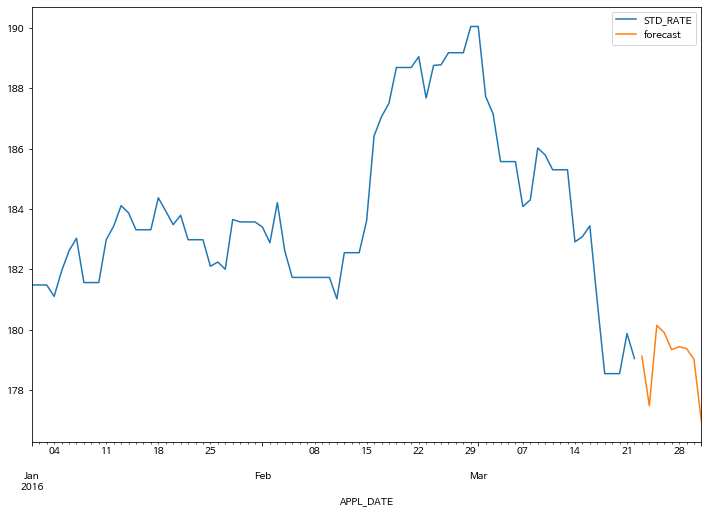

In [180]:
from datetime import datetime
#STEP 4. 예측 및 결과 해석
#예측 시작 날짜 생성: "날짜",format
start_time = df_cny_test.index.min()
end_time = df_cny_test.index.max()
fig,ax = plt.subplots(figsize =(12,8))
# 예측 전까지 데이터
ax = df_cny_train.plot(ax = ax)
# 예측 그래프 생성함수, start:예측시작,end:예측종료, plot_insample:가지고 있는 데이터 중 예측 구간과 겹치는 구간표시
fig = ts_result_cny.plot_predict(start = start_time, end = end_time, ax = ax,plot_insample=False)

